In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import NullFormatter
from scipy import stats
import plotly.express as px
plt.style.use('ggplot')   
%matplotlib inline

In [2]:
pl_fig = pd.read_csv("plr_fig.csv")


In [3]:
pl_fig.head()

,id,visits,last_visit,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean
0,513,170,2025-01-01T00:00:00,-2875.148603,109.875125,-16.912639,11394.0,12.378802,67.023529,1.166177e+05,126.697199,685.986689
1,773,177,2024-12-31T00:00:00,-1930.836828,90.129857,-10.908683,11428.0,12.181653,64.564972,1.062932e+05,113.302986,600.526384
2,262,187,2024-12-28T00:00:00,-20135.553526,216.756508,-107.676757,74899.0,41.332264,400.529412,7.249878e+05,400.077287,3876.940261
3,261,195,2025-01-01T00:00:00,3987.011624,430.211895,20.446213,18400.0,14.183572,94.358974,6.555597e+05,505.335718,3361.844365
4,785,177,2024-12-23T00:00:00,-786.101133,1541.486173,-4.441249,27624.0,29.103865,156.067797,2.795152e+06,2944.893472,15791.821366


In [4]:
pl_fig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          100 non-null    int64  
 1   visits      100 non-null    int64  
 2   last_visit  100 non-null    object 
 3   res_sum     100 non-null    float64
 4   res_std     100 non-null    float64
 5   res_mean    100 non-null    float64
 6   hands_sum   100 non-null    float64
 7   hands_std   100 non-null    float64
 8   hands_mean  100 non-null    float64
 9   bets_sum    100 non-null    float64
 10  bets_std    100 non-null    float64
 11  bets_mean   100 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 9.5+ KB


In [5]:
pl_fig.describe()

,id,visits,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000
mean,562.210000,183.21000,-8558.386744,333.043502,-46.931893,33159.000000,22.311923,180.633640,6.461734e+05,538.790385,3516.643435
std,253.768617,12.59573,10152.089770,383.999337,54.348757,27023.921326,12.428305,145.885302,7.257465e+05,793.976191,3910.782236
min,102.000000,155.00000,-51827.410636,76.871208,-277.151929,3567.000000,1.816314,18.386598,1.053727e+05,103.819792,600.526384
25%,355.000000,175.75000,-15617.264617,100.065092,-85.284168,12644.500000,12.175713,69.117287,1.271823e+05,121.638560,692.647106
50%,574.000000,182.00000,-5338.372717,224.796967,-30.789206,17800.500000,14.481149,99.348700,6.241923e+05,378.317847,3457.599704
75%,754.000000,193.00000,-1933.765071,424.007660,-11.165655,67870.250000,36.669851,384.953851,7.223530e+05,473.860575,3915.919610
max,993.000000,218.00000,40345.421134,1588.082901,207.966088,84240.000000,44.168470,420.864865,3.058680e+06,3403.753990,16014.029986


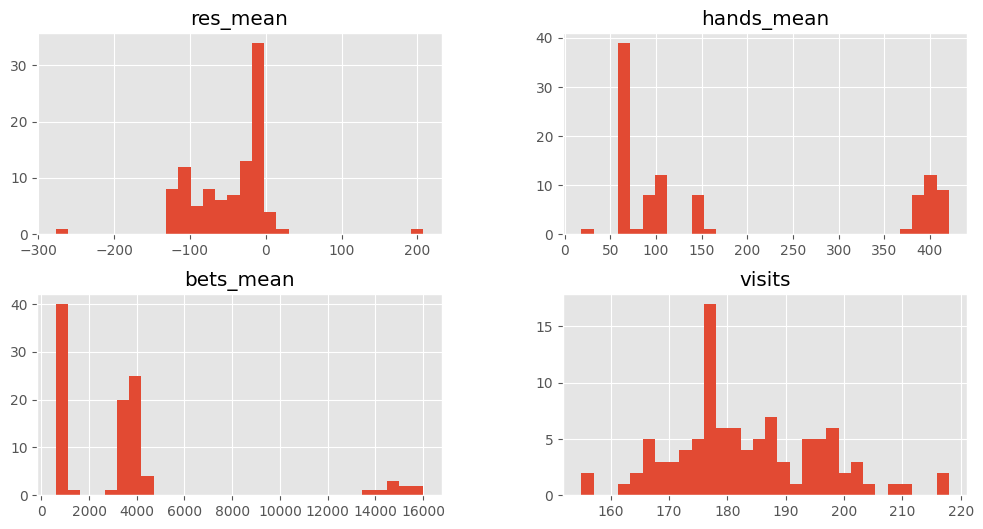

In [6]:
pl_fig[['res_mean','hands_mean','bets_mean', 'visits']].hist(figsize=(12,6), bins=30);

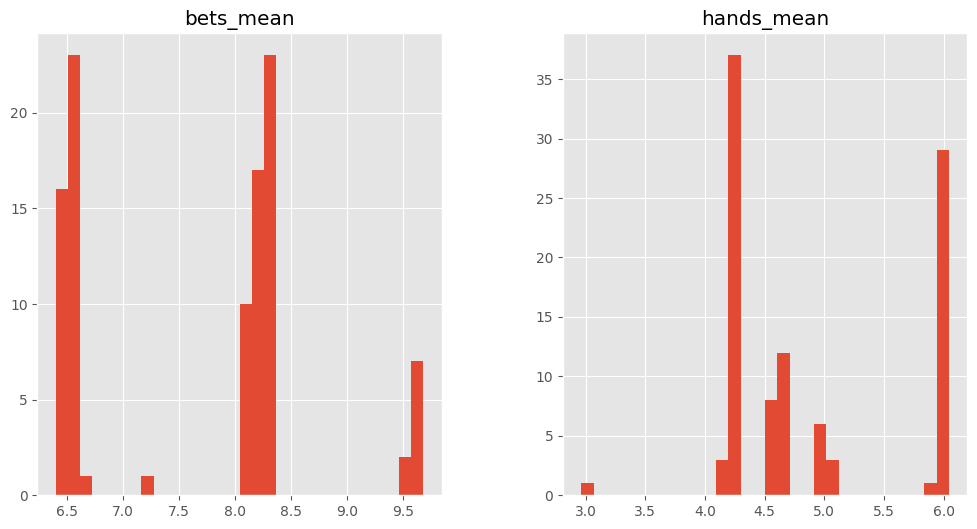

In [7]:
g = (
    pl_fig[['bets_mean', 'hands_mean']]
    .apply(lambda w: np.log(w + 1))
    .hist(figsize=(12,6), bins=30)
)

g;

In [8]:
# !pip install plotly

In [9]:
# px.scatter_3d(
#     pl_fig,
#     x='res_sum',
#     y='bets_mean',
#     z='visits',
#     color='visits'
# ).show(renderer='browser')

In [10]:
px.scatter_3d(
    pl_fig,
    x='res_sum',
    y='bets_mean',
    z='visits',
    color='visits'
).show(renderer='browser')

In [11]:
pl_fig['visits_quar'] = pd.qcut(pl_fig['visits'],4,['1','2','3','4'])
pl_fig['res_sum_quar'] = pd.qcut(pl_fig['res_sum'],4,['1','2','3','4'])
pl_fig['bets_mean_quar'] = pd.qcut(pl_fig['bets_mean'],4,['1','2','3','4'])

In [12]:
pl_fig

,id,visits,last_visit,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean,visits_quar,res_sum_quar,bets_mean_quar
0,513,170,2025-01-01T00:00:00,-2875.148603,109.875125,-16.912639,11394.0,12.378802,67.023529,1.166177e+05,126.697199,685.986689,1,3,1
1,773,177,2024-12-31T00:00:00,-1930.836828,90.129857,-10.908683,11428.0,12.181653,64.564972,1.062932e+05,113.302986,600.526384,2,4,1
2,262,187,2024-12-28T00:00:00,-20135.553526,216.756508,-107.676757,74899.0,41.332264,400.529412,7.249878e+05,400.077287,3876.940261,3,1,3
3,261,195,2025-01-01T00:00:00,3987.011624,430.211895,20.446213,18400.0,14.183572,94.358974,6.555597e+05,505.335718,3361.844365,4,4,2
4,785,177,2024-12-23T00:00:00,-786.101133,1541.486173,-4.441249,27624.0,29.103865,156.067797,2.795152e+06,2944.893472,15791.821366,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,501,180,2024-12-31T00:00:00,-11588.380598,1392.766087,-64.379892,26299.0,26.280009,146.105556,2.479029e+06,2477.239248,13772.385715,2,2,4
96,506,173,2024-12-18T00:00:00,-3391.765855,90.578309,-19.605583,11713.0,12.080167,67.705202,1.195016e+05,123.247655,690.760930,1,3,1
97,251,195,2024-12-30T00:00:00,-3225.223466,108.004471,-16.539608,13898.0,11.740920,71.271795,1.442060e+05,121.824059,739.517793,4,3,2
98,252,175,2024-12-29T00:00:00,-20059.461970,236.143542,-114.625497,69874.0,41.602698,399.280000,6.681157e+05,397.793395,3817.804022,1,1,3


In [13]:
pl_fig['vrb']= pl_fig.visits_quar.astype(str) + pl_fig.res_sum_quar.astype(str)+pl_fig.bets_mean_quar.astype(str)

In [14]:
pl_fig

,id,visits,last_visit,res_sum,res_std,res_mean,hands_sum,hands_std,hands_mean,bets_sum,bets_std,bets_mean,visits_quar,res_sum_quar,bets_mean_quar,vrb
0,513,170,2025-01-01T00:00:00,-2875.148603,109.875125,-16.912639,11394.0,12.378802,67.023529,1.166177e+05,126.697199,685.986689,1,3,1,131
1,773,177,2024-12-31T00:00:00,-1930.836828,90.129857,-10.908683,11428.0,12.181653,64.564972,1.062932e+05,113.302986,600.526384,2,4,1,241
2,262,187,2024-12-28T00:00:00,-20135.553526,216.756508,-107.676757,74899.0,41.332264,400.529412,7.249878e+05,400.077287,3876.940261,3,1,3,313
3,261,195,2025-01-01T00:00:00,3987.011624,430.211895,20.446213,18400.0,14.183572,94.358974,6.555597e+05,505.335718,3361.844365,4,4,2,442
4,785,177,2024-12-23T00:00:00,-786.101133,1541.486173,-4.441249,27624.0,29.103865,156.067797,2.795152e+06,2944.893472,15791.821366,2,4,4,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,501,180,2024-12-31T00:00:00,-11588.380598,1392.766087,-64.379892,26299.0,26.280009,146.105556,2.479029e+06,2477.239248,13772.385715,2,2,4,224
96,506,173,2024-12-18T00:00:00,-3391.765855,90.578309,-19.605583,11713.0,12.080167,67.705202,1.195016e+05,123.247655,690.760930,1,3,1,131
97,251,195,2024-12-30T00:00:00,-3225.223466,108.004471,-16.539608,13898.0,11.740920,71.271795,1.442060e+05,121.824059,739.517793,4,3,2,432
98,252,175,2024-12-29T00:00:00,-20059.461970,236.143542,-114.625497,69874.0,41.602698,399.280000,6.681157e+05,397.793395,3817.804022,1,1,3,113


In [15]:
clusters = pl_fig['vrb'].value_counts()

In [16]:
good_cluster = clusters[clusters >=3].index.values

In [17]:
good_cluster

array(['314', '123', '414', '223', '131', '432', '231', '442', '241',
       '213', '142', '324', '323', '431', '222', '441', '331', '114',
       '232'], dtype=object)

In [18]:
px.scatter_3d(
    pl_fig[pl_fig.vrb.isin(good_cluster)],
    x='res_sum',
    y='bets_mean',
    z='hands_sum',
    color='vrb'
).show(renderer='iframe')

In [19]:
px.scatter_3d(
    pl_fig,
    x='res_sum',
    y='res_std',
    z='hands_sum',
    color='res_mean'
# ).show(renderer='iframe')
).show(renderer='browser')